In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time

In [2]:
df = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

In [3]:
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [4]:
df.shape

(42, 2)

In [5]:
df.Quarter.unique()

array(['Q1_86', 'Q2_86', 'Q3_86', 'Q4_86', 'Q1_87', 'Q2_87', 'Q3_87',
       'Q4_87', 'Q1_88', 'Q2_88', 'Q3_88', 'Q4_88', 'Q1_89', 'Q2_89',
       'Q3_89', 'Q4_89', 'Q1_90', 'Q2_90', 'Q3_90', 'Q4_90', 'Q1_91',
       'Q2_91', 'Q3_91', 'Q4_91', 'Q1_92', 'Q2_92', 'Q3_92', 'Q4_92',
       'Q1_93', 'Q2_93', 'Q3_93', 'Q4_93', 'Q1_94', 'Q2_94', 'Q3_94',
       'Q4_94', 'Q1_95', 'Q2_95', 'Q3_95', 'Q4_95', 'Q1_96', 'Q2_96'],
      dtype=object)

In [6]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [8]:
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [9]:
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [10]:
df.isna().sum()

Quarter    0
Sales      0
dtype: int64

In [11]:
quat=[]
for i in df.Quarter:
    j = i[:2]
    quat.append(j)

In [12]:
quater = pd.DataFrame(quat)

In [13]:
quater[:5]

,0
0,Q1
1,Q2
2,Q3
3,Q4
4,Q1


In [14]:
num = []
for j in df.Quarter:
    n = j[3:]
    num.append(n)

In [15]:
num = pd.DataFrame(num)

In [16]:
df.insert(0, "Quaters", quater)

In [17]:
df.insert(1, "Quat_nums", num.astype(str).astype(int))

In [18]:
df.head()

,Quaters,Quat_nums,Quarter,Sales
0,Q1,86,Q1_86,1734.827000
1,Q2,86,Q2_86,2244.960999
2,Q3,86,Q3_86,2533.804993
3,Q4,86,Q4_86,2154.962997
4,Q1,87,Q1_87,1547.818996


In [19]:
df.drop('Quarter',axis=1, inplace=True)

In [20]:
df.head()

,Quaters,Quat_nums,Sales
0,Q1,86,1734.827000
1,Q2,86,2244.960999
2,Q3,86,2533.804993
3,Q4,86,2154.962997
4,Q1,87,1547.818996


In [21]:
df.Quaters.unique()

array(['Q1', 'Q2', 'Q3', 'Q4'], dtype=object)

In [22]:
df.Quat_nums.unique()

array([86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96])

In [23]:
df.Quaters.value_counts()

Q1    11
Q2    11
Q4    10
Q3    10
Name: Quaters, dtype: int64

In [24]:
df.Quat_nums.value_counts()

95    4
94    4
93    4
92    4
91    4
90    4
89    4
88    4
87    4
86    4
96    2
Name: Quat_nums, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Quaters    42 non-null     object 
 1   Quat_nums  42 non-null     int32  
 2   Sales      42 non-null     float64
dtypes: float64(1), int32(1), object(1)
memory usage: 968.0+ bytes


In [26]:
df.Quaters.value_counts()

Q1    11
Q2    11
Q4    10
Q3    10
Name: Quaters, dtype: int64

In [27]:
df.Quat_nums.value_counts()

95    4
94    4
93    4
92    4
91    4
90    4
89    4
88    4
87    4
86    4
96    2
Name: Quat_nums, dtype: int64

In [28]:
df

,Quaters,Quat_nums,Sales
0,Q1,86,1734.827000
1,Q2,86,2244.960999
2,Q3,86,2533.804993
3,Q4,86,2154.962997
4,Q1,87,1547.818996
5,Q2,87,2104.411995
6,Q3,87,2014.362999
7,Q4,87,1991.746998
8,Q1,88,1869.049999
9,Q2,88,2313.631996


In [29]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'Quat_nums'}>,
        <AxesSubplot:title={'center':'Sales'}>]], dtype=object)

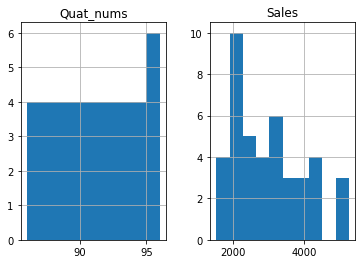

In [30]:
df.hist()

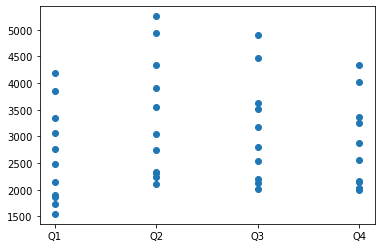

In [31]:
plt.scatter(df.Quaters,df.Sales)

<BarContainer object of 42 artists>

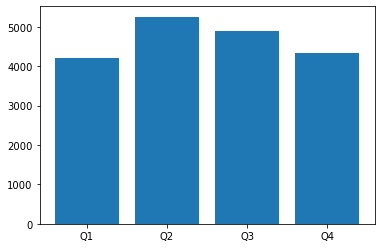

In [32]:
plt.bar(df.Quaters,df.Sales)

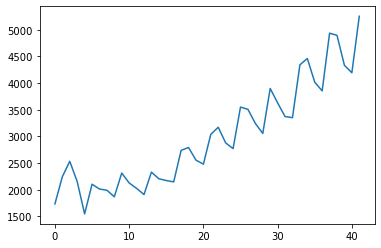

In [33]:
plt.plot(df.Sales)

<AxesSubplot:>

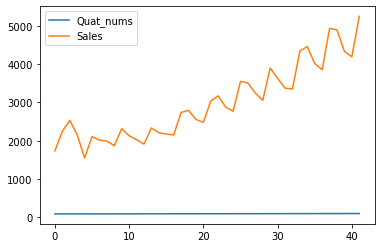

In [34]:
df.plot()

In [35]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
Quaters,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,Q1,Q2,...,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,Q1,Q2
Quat_nums,86,86,86,86,87,87,87,87,88,88,...,94,94,94,94,95,95,95,95,96,96
Sales,1734.83,2244.96,2533.8,2154.96,1547.82,2104.41,2014.36,1991.75,1869.05,2313.63,...,3352,4342,4461,4017,3854,4936,4895,4333,4194,5253


## Simple Linear Method (Seasonality)

In [36]:
import statsmodels.formula.api as smf

In [37]:
model = smf.ols("Sales~ Quat_nums", data=df).fit()

In [38]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

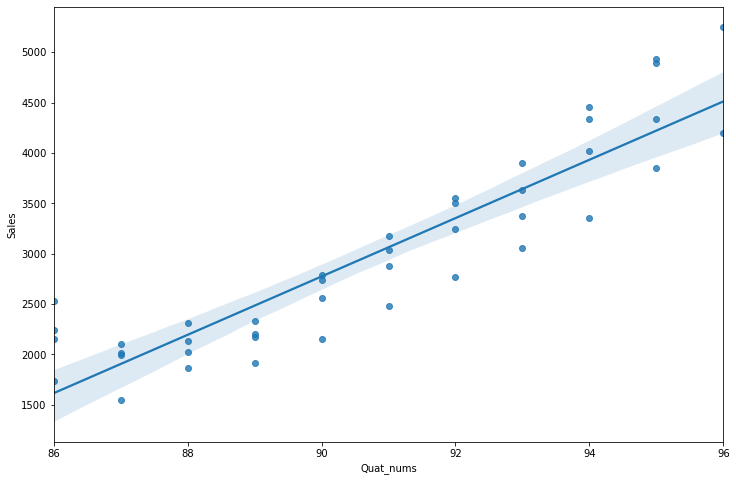

In [40]:
plt.figure(figsize=(12,8))
sns.regplot(x='Quat_nums', y='Sales', data=df)
plt.show

In [41]:
model.rsquared

0.8295243756739321

In [42]:
model.rsquared_adj

0.8252624850657804

In [43]:
model.pvalues

Intercept    3.101591e-15
Quat_nums    5.887436e-17
dtype: float64

## Different forcasting Method

In [46]:
cocola = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

In [47]:
#cocola = cocola.values

C:\Users\saurav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

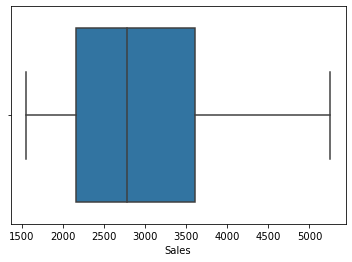

In [48]:
sns.boxplot("Sales",data=cocola)

<AxesSubplot:>

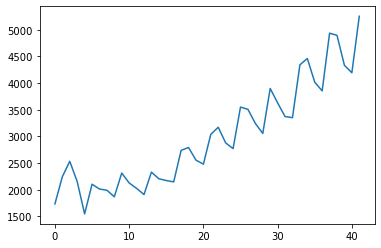

In [49]:
# moving average for the time series to understand better about the trend character in Amtrak
cocola.Sales.plot(label="org")

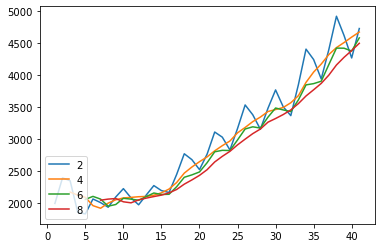

In [50]:
for i in range(2,10,2):
    cocola["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

In [51]:
df.head()

,Quaters,Quat_nums,Sales
0,Q1,86,1734.827000
1,Q2,86,2244.960999
2,Q3,86,2533.804993
3,Q4,86,2154.962997
4,Q1,87,1547.818996


## decompose_ts_add = seasonal_decompose(cocola.Sales,model="additive")

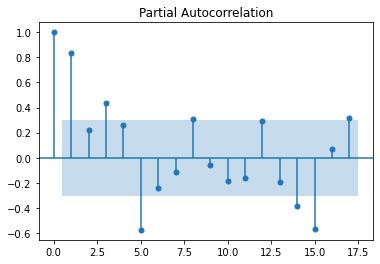

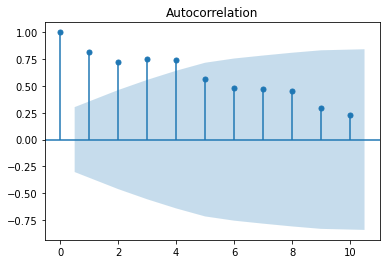

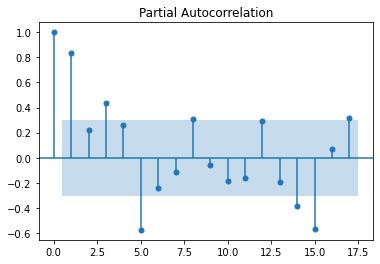

In [52]:
# ACF plots and PACF plots on Original data sets 
tsa_plots.plot_acf(cocola.Sales,lags=10)
tsa_plots.plot_pacf(cocola.Sales)

## Test data and left over data as train data 

Train = cocola.head(48)
Test =cocola.tail(12)

In [59]:
Train = cocola.head(48)
Test =cocola.tail(12)

In [60]:
# Creating a function to calculate the MAPE value for test data 
def MAPE(pred,org):
    temp = np.abs((pred-org))*100/org
    return np.mean(temp)


## Simple Exponential Method

In [61]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) # 9.76

C:\Users\saurav\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


9.681026212917489

## Holt method 

In [62]:
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) # 9.82

11.025182503719508

In [63]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4,damped=True).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)# 3.10

<ipython-input-63-383dbf709136>:2: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4,damped=True).fit()


3.2450727952558847

In [64]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales) # 2.35

2.993028685896603

#### # Visualization of Forecasted values for Test data set using different methods 

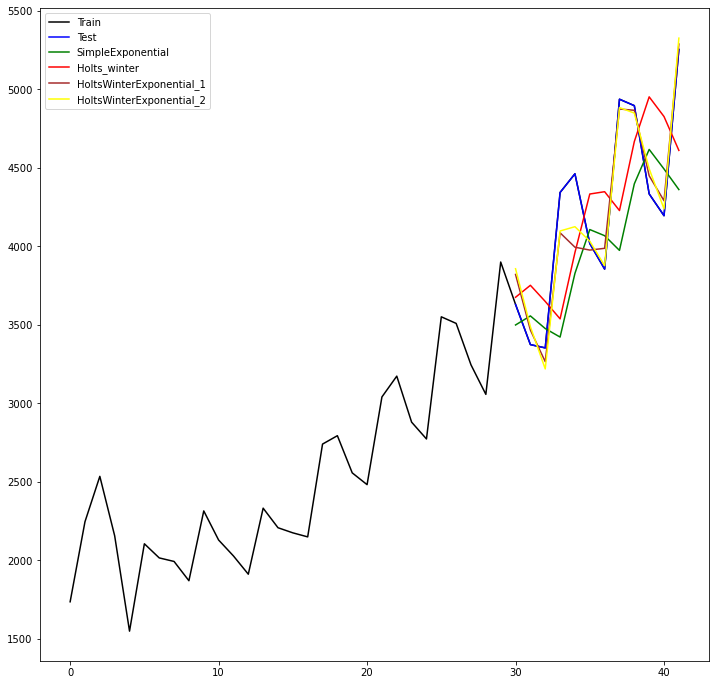

In [65]:
plt.figure(figsize = (12,12))
plt.plot(Train.index, Train["Sales"], label='Train',color="black")
plt.plot(Test.index, Test["Sales"], label='Test',color="blue")
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")
plt.legend(loc='best')
plt.show()